## Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

## Loading California Dataset
1. MedInc: Median income in the block group
2. HouseAge: Median house age in block group
3. AveRooms: Average number of rooms per household
4. AveBedrms: Average number of bedrooms per household
5. Population: Block group population
6. AveOccup: Average number of household members
7. Latitude: Block group latitude
8. Longitude: Block group longitude

In [2]:
california = fetch_california_housing()

X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['Median_House_Value'])
df = pd.concat([X, y], axis=1)

## Exploratory Data Analysis (EDA)

In [3]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_House_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_House_Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   Median_House_Value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Check for missing values**

In [6]:
df.isna().any()

MedInc                False
HouseAge              False
AveRooms              False
AveBedrms             False
Population            False
AveOccup              False
Latitude              False
Longitude             False
Median_House_Value    False
dtype: bool

**Check for duplicated values**

In [7]:
df.duplicated().any()

False

In [8]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for MedInc:
MedInc
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64


Value counts for HouseAge:
HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64


Value counts for AveRooms:
AveR

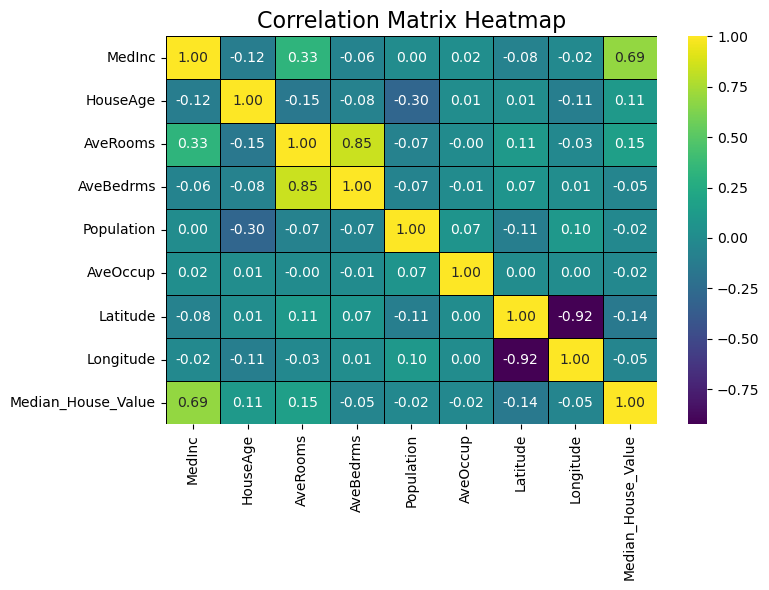

In [9]:
df_corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=df_corr, cmap='viridis',annot=True,fmt='.2f',linewidths=0.5,linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()

## Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training with Pipeline

In [11]:
dt_pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(max_depth=9, random_state=42)),
])

dt_pipeline.fit(X_train, y_train.values.ravel())
dt_y_pred = dt_pipeline.predict(X_test)

## Model Evaluation

In [12]:
# DECISION TREE REGRESSOR
dt_r2 = r2_score(y_test, dt_y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))

print("Decision Tree Regressor:")
print(f"R²: {dt_r2:.4f}")
print(f"RMSE: {dt_rmse:.4f}")

Decision Tree Regressor:
R²: 0.6833
RMSE: 0.6443
